# Scotch Reviews EDA

Now that I have gathered some data for scotch reviews, I need to perform my EDA to better understand the data I'm working with.  I'm going to start small and work from there, so for the time being, I'm going to ignore the `'reviews'` column which contains reviews from actual consumers and instead focus on the more consistant information that is non-subjective to the individuals.
   - `'taste'`, `'score'`,`'spirit_stype`' and maybe `'country'`.
   
I'll also use this time to clean up any data issues that I come across.

![generic scotch image](Images/scotches.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./Data/scotches_df.csv')
df.head()

,Unnamed: 0,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews
0,0,A.D. Rattray Aberfeldy 18 Yr,99.99,750ml,-1.0,,-1,"Highlands, Scotland- Pleasant aromas of caram...",A.D. Rattray,Scotland,Highland,Scotch,Single Malt,No Reviews
1,1,A.D. Rattray Auchroisk 22 Yr,139.99,750ml,-1.0,,-1,"Speyside, Scotland - This Auchroisk is quite ...",A.D. Rattray,Scotland,NaN,Scotch,Single Malt,No Reviews
2,2,A.D. Rattray Aultmore 16 Year,97.99,750ml,-1.0,,-1,"Speyside, Scotland- Aroma of honey, ripe frui...",A.D. Rattray,Scotland,NaN,Scotch,Single Malt,No Reviews
3,3,A.D. Rattray Ben Nevis 17Yr Single Cask Barrel...,99.99,750ml,-1.0,Delicate . Apple . Grass . Vanilla . Complex,-1,NaN,A.D. Rattray,Scotland,Highland,Scotch,Single Malt,No Reviews
4,4,A.D. Rattray Benriach 23 Yr,179.99,750ml,-1.0,,-1,"Speyside, Scotland- Rich aromas of honey and ...",A.D. Rattray,Scotland,NaN,Scotch,Single Malt,No Reviews


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 13 columns):
title           1428 non-null object
price           1428 non-null float64
size            1428 non-null object
avg_rating      1428 non-null float64
taste           1428 non-null object
score           1428 non-null int64
description     1382 non-null object
brand           1424 non-null object
country         1428 non-null object
state           830 non-null object
spirit_type     1428 non-null object
spirit_style    1408 non-null object
reviews         1274 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 145.1+ KB


# Taste Column

The taste column is where im going to start my EDA.  In this column it has the descriptive tastes provided by professionals/distillers of what the scotch is _supposed_ to represent.  I think this could also be a good starting point for my recommender. Build it simple then add the complexity of reviews.

#### Cleaning.
1. There are alot of blank values, which ended up being empty strings with lengths of 1
2. Taste Notes are represented as a string with values divided separated by periods.

In [4]:
# Figuring out what the blank values were
len(df['taste'].value_counts().index[0])

1

In [5]:
# fill those blank values with a 'None' String
df.replace(to_replace=' ', value = 'None', inplace = True)

In [6]:
# converting tastes from a wierd string to a list
def taste_to_list(taste_s):
    return taste_s.lower().split(' . ')

df['taste_list'] = df['taste'].apply(taste_to_list)

In [7]:
# flattening all lists and removing 'none's
all_notes = [item for subitem in df['taste_list'].values for item in subitem if item != 'none']

In [8]:
# some words had some blank spaces in the for some reason.
all_notes = [item.strip(' ') for item in all_notes]

In [9]:
# Checking out how many times all the words appear.
# top 15 for Github/ rendering
pd.Series(all_notes).value_counts()[:15]

rich        378
balanced    329
long        267
spice       164
vanilla     162
oak         160
complex     158
fruit       151
smoke       137
medium      131
intense     113
peat        100
honey        99
delicate     98
light        90
dtype: int64

In [10]:
# getting all notes, for whatever reason a blank string was also in there a the 0th index
notes = sorted(pd.Series(all_notes).value_counts().index)[1:]

In [11]:
# 84 Different notes.
len(notes)

84

### Going to Count Vectorize the Text notes

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# Subsetting data to those with Professional Notes
df2 = df[df['taste'] != 'None']

In [14]:
df2.head()

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
3,A.D. Rattray Ben Nevis 17Yr Single Cask Barrel...,99.99,750ml,-1.0,Delicate . Apple . Grass . Vanilla . Complex,-1,NaN,A.D. Rattray,Scotland,Highland,Scotch,Single Malt,No Reviews,"[ delicate, apple, grass, vanilla, complex ]"
9,A.D. Rattray Girvan 1964 50 Yr,899.99,750ml,-1.0,Rich . Orange . Chocolate . Nut . Long,-1,"Lowlands, Scotland - This 50 year old express...",A.D. Rattray,Scotland,Lowland,Scotch,Single Malt,No Reviews,"[ rich, orange, chocolate, nut, long ]"
11,A.D. Rattray Glen Elgin 1995 Single Barrel Select,119.99,750ml,-1.0,Medium . Vanilla . Spice . Long,-1,"Speyside, Scotland- Bright gold color, with a...",A.D. Rattray,Scotland,NaN,Scotch,Single Malt,No Reviews,"[ medium, vanilla, spice, long ]"
18,A.D. Rattray Stronachie 12yr,49.99,750ml,-1.0,Peat . Nut,-1,"Highlands, Scotland- Slightly syrupy, malty, ...",A.D. Rattray,Scotland,Highland,Scotch,Single Malt,No Reviews,"[ peat, nut ]"
21,Aberfeldy 12 yo,32.99,750ml,4.5,Rich . Spice . Honey . Long,-1,"Highlands, Scotland- Reserved as the heart of...",Aberfeldy,Scotland,Highland,Scotch,Single Malt,{'review_1': {'review_desc': ' A really goo...,"[ rich, spice, honey, long ]"


In [16]:
df2['taste_vector'] = df2['taste_list'].apply(lambda x : ' '.join(x))
# ignore the copy of a slice warning.

/Users/samstack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
# instantiate Count Vectorizer
tvec = CountVectorizer()

In [18]:
notes_df = pd.DataFrame(tvec.fit_transform(df2['taste_vector']).todense(),
             columns = tvec.get_feature_names())

## Check how the notes correlate with other notes.  
This will let me know what flavors are commonly described together and potentially remove those that are perfectly correlated.

In [19]:
# Given that is a 84 by 84 matrix, a single visualization would be over crouded so I broke it up
# into quartiles.
top_left  = notes_df.corr().iloc[:42][notes_df.columns[:42]]
top_right = notes_df.corr().iloc[:42][notes_df.columns[42:]]
bot_left  = notes_df.corr().iloc[42:][notes_df.columns[:42]]
bot_right = notes_df.corr().iloc[42:][notes_df.columns[42:]]

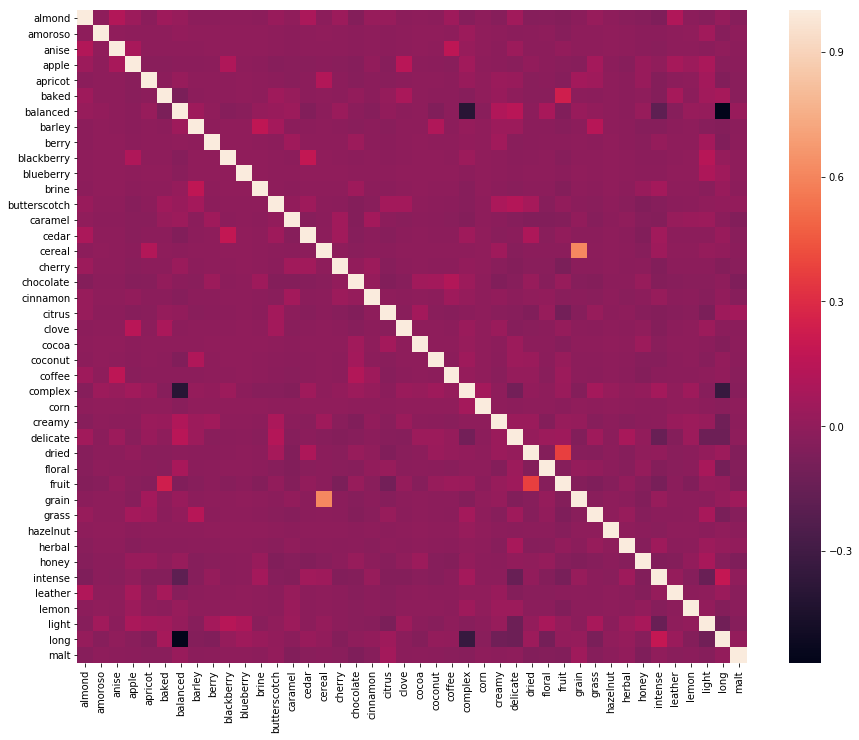

In [20]:
plt.figure(figsize = (15,12))
sns.heatmap(top_left)
plt.show()

Seems like 'grain' and 'cereal' are used frequently together, but not enough for me to remove them.

Seems like 'long', 'balanced' and 'complex' are notes that are infrequently used together.

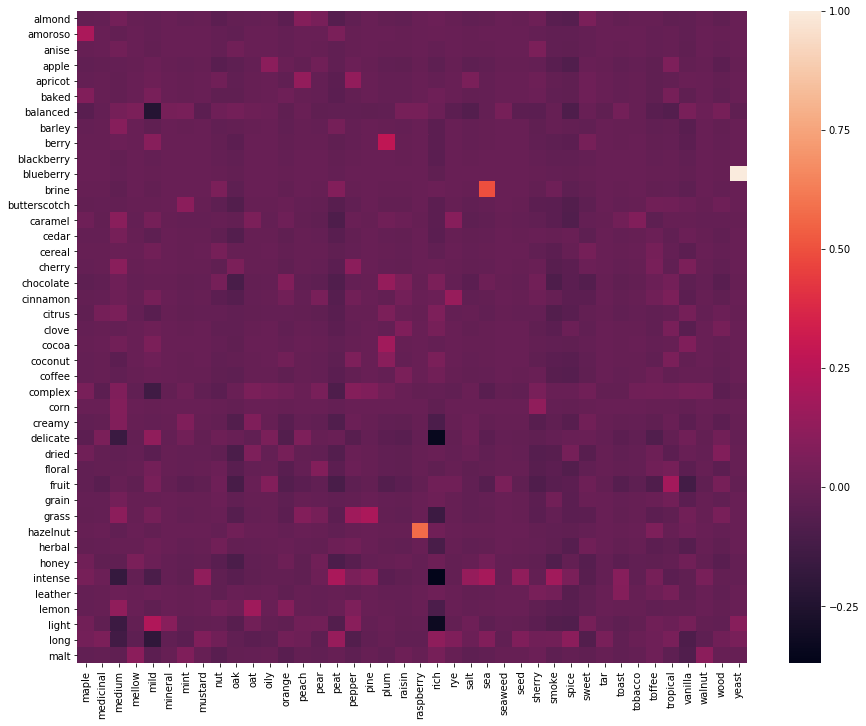

In [21]:
plt.figure(figsize = (15,12))
sns.heatmap(top_right)
plt.show()

Strangely, '`blueberry`' and '`yeast`' and quite correlated. I'll want to look into that later, it could be that  those flavor profiles are commonly used and the few niche cases in which they are, they're used together.

'`Rich`' does not seem to be used very often with '`delicate`', '`intense`' or '`light`'.

In [84]:
#The bottom left is just the complete mirror of the top right 
#so theres no reason to look at it to gain additional insight


# plt.figure(figsize = (15,12))
# sns.heatmap(bot_left,)
# plt.show()

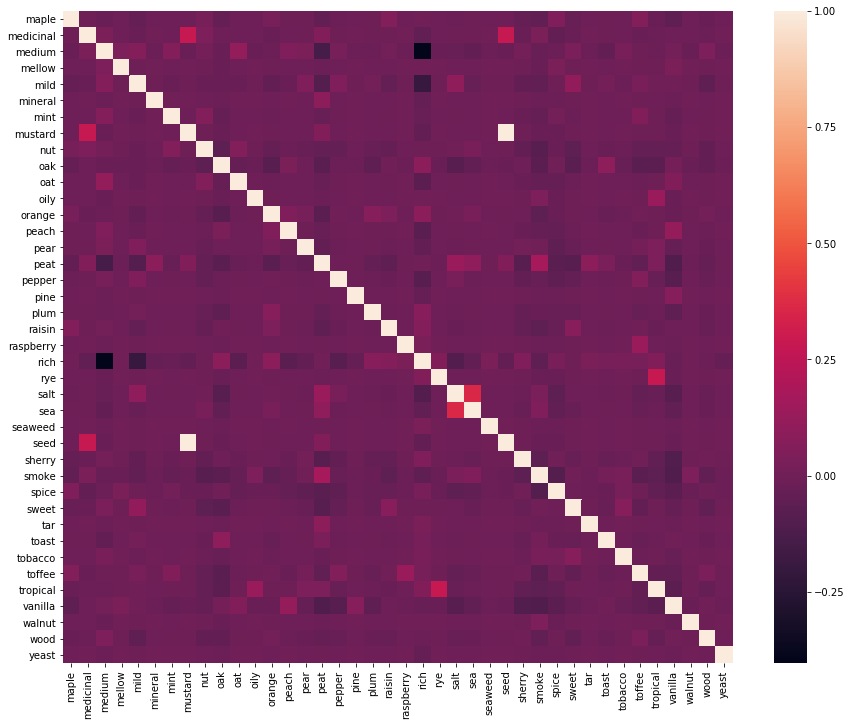

In [22]:
plt.figure(figsize = (15,12))
sns.heatmap(bot_right)
plt.show()

`'Rich'` and `'medium'`, tend to not be frequently used together.

`'Mustard'` and `'seed'` seem to be perfectly correlated... I wonder if that is because the note is actually `'Mustard Seed'`.  I'll probably remove `'seed'` from the corpus.

_I'll do some due diligence to confirm that all observations where "mustard" occurs "seed" also occurs._

In [26]:
notes_df['mustard'].value_counts()

0    818
1      2
Name: mustard, dtype: int64

In [27]:
notes_df['seed'].value_counts()

0    818
1      2
Name: seed, dtype: int64

In [28]:
notes_df[notes_df['mustard'] == 1][['mustard','seed']]

,mustard,seed
120,1,1
402,1,1


Yes, looks like there are two occurrences of `'mustard'` and `'seed'` are the same observations, so I'll remove `'seed'` as a potential feature. 

---

## Analyze Price and Average Score

#### Price Distribution

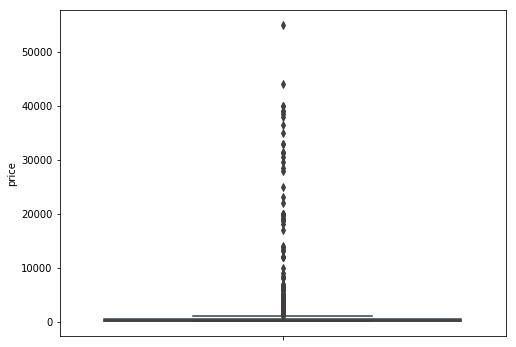

In [29]:
# Ok, so there are some scotches that are just stupid expensive.
plt.figure(figsize = (8,6))
sns.boxplot( y = 'price', data = df2);

_"Would you like to buy a bottle of this here scotch or put a down payment on a house?"_

This is a really uninformative box plot because of the number and spread of outliers.

In [30]:
# 64 scotches that are more than $5000, 
df[df['price'] > 5000].shape

(64, 14)

In [31]:
# 131 scotches that are more than $1500, 
df[df['price'] > 1500].shape

(131, 14)

_Who would have thought that Scotches could be so damn expensive!?_

I'm going to use Tukey's method to detect and mark for removal of bottles of Scotch I will never be able to afford.

- Lower Outlier = $Q_1 - K(Q_3 - Q_1)$  
- Upper Outlier = $Q_1 - K(Q_3 - Q_1)$

    Where $Q_1$ represents the end of the first quartile, $Q_3$ represents the end of the third quartile, and $K$ is a constant value.  Tukey recommended 1.5 for K for most situations and 3 for more extreme situations.

In [32]:
# Get Q1 and Q3
df['price'].describe()

count     1428.000000
mean      1171.717234
std       4854.600040
min          8.990000
25%         53.990000
50%         99.990000
75%        229.990000
max      54999.990000
Name: price, dtype: float64

In [33]:
IQR = 229.99 - 57.74

# Typical
print(229.99 + 1.5 * IQR)

# Extreme
print(229.99 + 3 * IQR)

488.365
746.74


In [34]:
df[df['price'] > 488.365].shape

(228, 14)

In [35]:
df[df['price'] > 746.74].shape

(184, 14)

Given that I'm only doing some EDA, I'll utilize the extreme outlier detection to make my selection.

_Given that my recommender is intended for personal/private use I will also make the assumption that myself nor any on that I run this model for will want to buy a $1000 bottle of scotch and thus those will most likely be removed from the model._

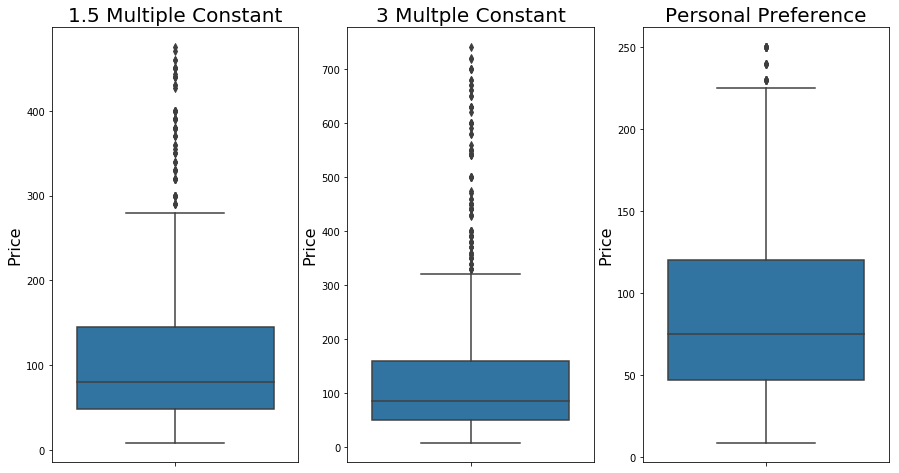

In [36]:
plt.figure(figsize = (15,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'price', data = df[df['price'] < 488.365], );
plt.title('1.5 Multiple Constant', fontsize = 20)
plt.ylabel('Price', fontsize = 16)

plt.subplot(1,3,2)
sns.boxplot(y = 'price', data = df[df['price'] < 746.74], );
plt.title('3 Multple Constant', fontsize = 20)
plt.ylabel('Price', fontsize = 16)

plt.subplot(1,3,3)
sns.boxplot(y = 'price', data = df[df['price'] < 250.00], );
plt.title('Personal Preference', fontsize = 20)
plt.ylabel('Price', fontsize = 16)
plt.show()

Surprisingly, even after removing outliers, there are still outliers.  Appears that there are a high density of scotches that are in that \$50 to $150 dollar range,  which is actually a reasonable range (for me).

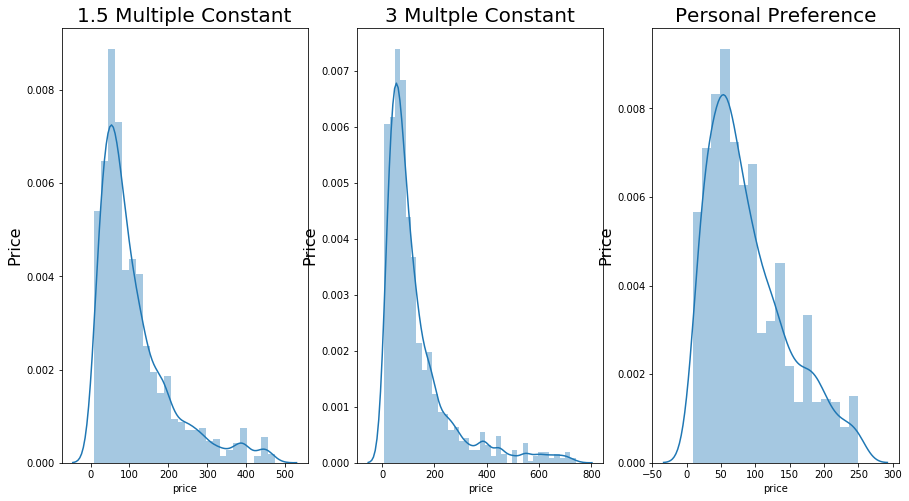

In [37]:
plt.figure(figsize = (15,8))
# 1.5 Constant multiple for inner quartile range
plt.subplot(1,3,1)
sns.distplot(a = df[df['price'] < 488.365]['price'] );
plt.title('1.5 Multiple Constant', fontsize = 20)
plt.ylabel('Price', fontsize = 16)
# 3.0 Constant multiple for inner quartile range
plt.subplot(1,3,2)
sns.distplot(a = df[df['price'] < 746.74]['price'] );
plt.title('3 Multple Constant', fontsize = 20)
plt.ylabel('Price', fontsize = 16)
# Personal preference in that i'm not interested in spending over $250 
plt.subplot(1,3,3)
sns.distplot(a = df[df['price'] < 250.00]['price'] );
plt.title('Personal Preference', fontsize = 20)
plt.ylabel('Price', fontsize = 16)

plt.show()

Appears that there is a lot of density around $60 dollars a bottle, as a consumer I'm ok with this.

#### Rating
- Ok, so there are a lot of Scotches that did not have user reviews so they got a -1 rating.

In [38]:
df2.head()

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list,taste_vector
3,A.D. Rattray Ben Nevis 17Yr Single Cask Barrel...,99.99,750ml,-1.0,Delicate . Apple . Grass . Vanilla . Complex,-1,NaN,A.D. Rattray,Scotland,Highland,Scotch,Single Malt,No Reviews,"[ delicate, apple, grass, vanilla, complex ]",delicate apple grass vanilla complex
9,A.D. Rattray Girvan 1964 50 Yr,899.99,750ml,-1.0,Rich . Orange . Chocolate . Nut . Long,-1,"Lowlands, Scotland - This 50 year old express...",A.D. Rattray,Scotland,Lowland,Scotch,Single Malt,No Reviews,"[ rich, orange, chocolate, nut, long ]",rich orange chocolate nut long
11,A.D. Rattray Glen Elgin 1995 Single Barrel Select,119.99,750ml,-1.0,Medium . Vanilla . Spice . Long,-1,"Speyside, Scotland- Bright gold color, with a...",A.D. Rattray,Scotland,NaN,Scotch,Single Malt,No Reviews,"[ medium, vanilla, spice, long ]",medium vanilla spice long
18,A.D. Rattray Stronachie 12yr,49.99,750ml,-1.0,Peat . Nut,-1,"Highlands, Scotland- Slightly syrupy, malty, ...",A.D. Rattray,Scotland,Highland,Scotch,Single Malt,No Reviews,"[ peat, nut ]",peat nut
21,Aberfeldy 12 yo,32.99,750ml,4.5,Rich . Spice . Honey . Long,-1,"Highlands, Scotland- Reserved as the heart of...",Aberfeldy,Scotland,Highland,Scotch,Single Malt,{'review_1': {'review_desc': ' A really goo...,"[ rich, spice, honey, long ]",rich spice honey long


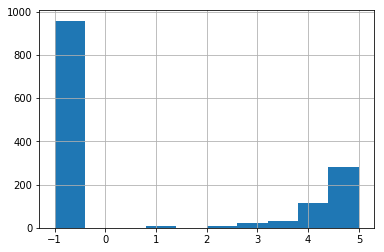

In [39]:
df['avg_rating'].hist()

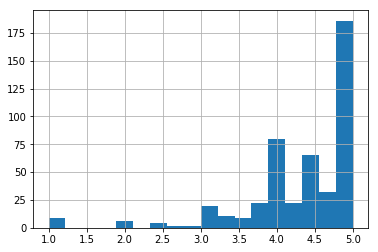

In [40]:
df[df['avg_rating'] > 0]['avg_rating'].hist(bins = 18);

Lots of highly rated scotch, many approaching or at 5.  Lets subset that 4.5 - 5 star range for a deeper look.
As is common, many 4s.  It seems we see more and more 4s these days as it indicates that a user someone enjoyed it but was not impressed with any one thing or could not put their finger on anyone aspect that made it more enjoyable than another, however a 3 indicates there was some subjective negative aspect that the user experienced. (This is not a fact its just what I have noticed when looking at any kinds of reviews.)


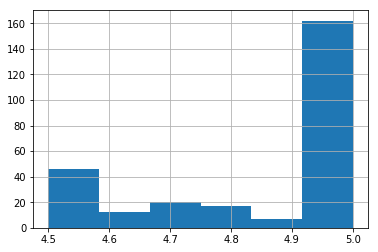

In [41]:
df[df['avg_rating'] > 4.4]['avg_rating'].hist(bins = 6);

To my surprise, loads of 5 star reviews in the scotch realm.  This, ladies and gentlemen, is not something you see everyday. 

Given the large quantity of items that have no user reviews as well as an abundance of 5 star reviews, I'm greatly considering removing reviews as a potential feature for the similarity model.  After all, just because you enjoyed a scotch that most people decided was a 4 star should not affect the ability to me to recommend a 5 star scotch.

---

#### Price compared to rating.

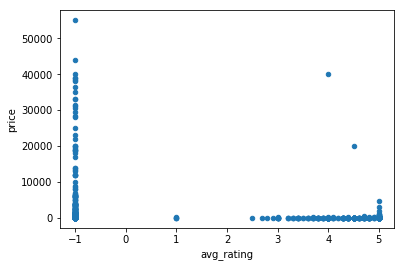

In [67]:
# all scotches
df2.plot.scatter(x = 'avg_rating', y = 'price');

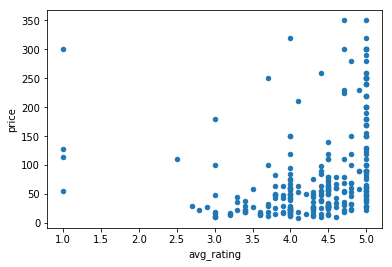

In [43]:
# just reasonably priced scotches compared to those with actual ratings.
df2[(df2['price'] < 350) & (df2['avg_rating'] > 0)].plot.scatter(x = 'avg_rating', y = 'price');

It doesn't really appear to be that price and avg rating have some kind of relation.  

----

## Country and State

Going to investigate the various countries that _also_ produce scotch as well as the States that whiskey comes from.

In [44]:
df['country'].value_counts()

Scotland         1324
Japan              45
India              25
Taiwan             18
France              5
United States       4
Denmark             3
England             2
Austria             1
South Africa        1
Name: country, dtype: int64

In [45]:
df[df['country'] == 'Japan'].head(5)

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
39,Akashi Single Malt Japanese Whisky,99.99,750ml,-1.0,None,-1,"Japan - Located in the town of Akashi, near t...",Akashi,Japan,NaN,Scotch,Single Malt,No Reviews,[none]
40,Akashi White Oak Whisky,35.99,750ml,-1.0,None,-1,Japan - The aroma is delicate with notes of m...,Akashi,Japan,NaN,Scotch,Single Malt,No Reviews,[none]
867,Hakushu Japanese Whisky 12 Yr,79.99,750ml,4.5,None,92,Japan- A vibrant and fresh whisky straight fr...,Hakushu,Japan,NaN,Scotch,Single Malt,{'review_1': {'review_desc': ' A flavor bea...,[none]
868,Hakushu Single Malt 18Yr,269.99,750ml,-1.0,Medium . Cereal Grain . Fruit . Long,-1,Japan- A massive step up in quality from the ...,Hakushu,Japan,NaN,Scotch,Single Malt,No Reviews,"[ medium, cereal grain, fruit, long ]"
881,Hibiki 12 Yr,114.99,750ml,4.4,None,93,Japan- A stunning 12 year-old blend from Hibi...,Hibiki,Japan,NaN,Scotch,Single Malt,{'review_1': {'review_desc': ' hibiki 12 ...,[none]


In [46]:
df[df['country'] == 'Japan'].describe()

,price,avg_rating,score
count,45.000000,45.000000,45.000000
mean,155.234444,1.640000,13.600000
std,190.741395,2.752553,34.404942
min,27.990000,-1.000000,-1.000000
25%,59.990000,-1.000000,-1.000000
50%,79.990000,1.000000,-1.000000
75%,219.990000,4.800000,-1.000000
max,1199.990000,5.000000,95.000000


In [47]:
df[df['country'] == 'India'].head()

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
31,After Dark Premium Grain Whisky,14.99,750ml,5.0,None,-1,India- One-hundred percent grain based spirit...,After Dark,India,NaN,Scotch,Single Malt,NaN,[none]
87,Amrut Cask Strength,67.99,750ml,4.0,Intense . Oak . Citrus . Long,91,India- Classic house style with bourbon notes...,Amrut,India,NaN,Scotch,Single Malt,NaN,"[ intense, oak, citrus, long ]"
88,Amrut Double Cask,199.99,750ml,-1.0,None,-1,India- Amrut Double Cask is a unique blend fr...,Amrut,India,NaN,Scotch,Single Malt,No Reviews,[none]
89,Amrut Fusion,59.99,750ml,4.5,Rich . Fruit . Long,89,"India- Rich, barley and fruit nose with citru...",Amrut,India,NaN,Scotch,Single Malt,{'review_1': {'review_desc': ' Exqusite ! ...,"[ rich, fruit, long ]"
90,Amrut Kadhambam,139.99,750ml,-1.0,None,-1,India- This Amrut was matured in three casks....,Amrut,India,NaN,Scotch,Single Malt,No Reviews,[none]


In [48]:
df[df['country'] == 'India'].describe()

,price,avg_rating,score
count,25.000000,25.000000,25.000000
mean,88.190000,0.852000,6.280000
std,65.435082,2.628707,25.198413
min,14.990000,-1.000000,-1.000000
25%,52.990000,-1.000000,-1.000000
50%,67.990000,-1.000000,-1.000000
75%,109.990000,4.000000,-1.000000
max,259.990000,5.000000,91.000000


In [49]:
df[df['country'] == 'Taiwan'].head()
# Taiwan has some expensive scotches

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
987,Kavalan Ex Fino Sherry Cask,449.99,750ml,-1.0,Medium . Chocolate . Fruit . Mild,-1,Taiwan- The dark gold and amber color truly e...,Kavalan,Taiwan,NaN,Scotch,Single Malt,No Reviews,"[ medium, chocolate, fruit, mild ]"
988,Kavalan Whisky Amontillado Cask,539.99,750ml,-1.0,Delicate . Fruit . Wood . Caramel . Long,-1,Taiwan- Hints of raisin and coconut on the no...,Kavalan,Taiwan,NaN,Scotch,Single Malt,No Reviews,"[ delicate, fruit, wood, caramel, long ]"
989,Kavalan Whisky Classic,69.99,750ml,4.4,None,-1,"Taiwan - The nose is clean, elegant, floral, ...",Kavalan,Taiwan,NaN,Scotch,Single Malt,{'review_1': {'review_desc': ' Mellow and e...,[none]
990,Kavalan Whisky Classic w/ King Car 50ml & Glass,82.99,750ml Btl,-1.0,None,-1,Taiwan- This is a gift set that includes Kava...,Kavalan,Taiwan,NaN,Scotch,Single Malt,No Reviews,[none]
991,Kavalan Whisky Concertmaster,75.99,750ml,4.0,Medium . Grain . Smoke . Peat . Balanced,-1,Taiwan - The fresh air in Yilan gives Kavalan...,Kavalan,Taiwan,NaN,Scotch,Single Malt,NaN,"[ medium, grain, smoke, peat, balanced ]"


In [50]:
df[df['country'] == 'Taiwan'].describe()

,price,avg_rating,score
count,18.000000,18.000000,18.0
mean,250.128889,0.577778,-1.0
std,204.074223,2.627357,0.0
min,59.990000,-1.000000,-1.0
25%,97.990000,-1.000000,-1.0
50%,159.740000,-1.000000,-1.0
75%,404.990000,2.750000,-1.0
max,629.990000,5.000000,-1.0


In [51]:
df[df['country'] == 'France']

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
240,Bellevoye Whisky,34.99,750ml,4.5,Light . Oak . Complex,-1,"France - A non-peated, triple distilled blend...",Bellevoye,France,NaN,Scotch,Single Malt,{'review_1': {'review_desc': ' Fantastic! ...,"[ light, oak, complex ]"
334,Brenne French Single Malt 10 Yr Whisky,89.99,750ml,-1.0,None,93,France- Brenne Ten is made from organically-g...,Brenne,France,NaN,Scotch,Single Malt,No Reviews,[none]
335,Brenne French Single Malt Whisky,48.99,750ml,5.0,Light . Vanilla . Caramel . Mild,-1,France - Distilled from 100% estate grown org...,Brenne,France,NaN,Scotch,Single Malt,NaN,"[ light, vanilla, caramel, mild ]"
1402,Vicomte Cask Strength Single Malt,64.99,750ml,5.0,None,-1,France- Vicomte Cask Strength is a single mal...,Vicomte,France,NaN,Scotch,Single Malt,NaN,[none]
1403,Vicomte Single Malt French Whisky,47.99,750ml,4.0,None,-1,"France - Notes of candied apples, fresh citru...",Vicomte,France,NaN,Scotch,Single Malt,NaN,[none]


In [52]:
df[df['country'] == 'France'].describe()

,price,avg_rating,score
count,5.000000,5.00000,5.000000
mean,57.390000,3.50000,17.800000
std,21.102133,2.54951,42.038078
min,34.990000,-1.00000,-1.000000
25%,47.990000,4.00000,-1.000000
50%,48.990000,4.50000,-1.000000
75%,64.990000,5.00000,-1.000000
max,89.990000,5.00000,93.000000


In [53]:
df[df['country'] == 'United States']

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
709,Glen Salen Pre Malt,19.99,750ml,-1.0,None,-1,Scotland- Comprised of carefully selected sin...,Glen Salen,United States,NaN,Scotch,Single Malt,No Reviews,[none]
1092,Lost Spirits Abomination The Crying of the Puma,54.99,750ml,-1.0,None,-1,California- Smoky Islay malt whisky finished ...,Lost Spirits,United States,California,Scotch,Single Malt,No Reviews,[none]
1093,Lost Spirits Abomination The Sayers of the Law,54.99,750ml,-1.0,None,-1,California- Smoky Islay malt whisky finished ...,Lost Spirits,United States,California,Scotch,Single Malt,No Reviews,[none]
1326,St George Single Malt Whiskey,99.99,750ml,5.0,Rich . Vanilla . Balanced,-1,California- An unpeated single malt from the ...,St George,United States,California,Scotch,Single Malt,NaN,"[ rich, vanilla, balanced ]"


In [54]:
df[df['country'] == 'United States'].describe()

,price,avg_rating,score
count,4.000000,4.0,4.0
mean,57.490000,0.5,-1.0
std,32.787193,3.0,0.0
min,19.990000,-1.0,-1.0
25%,46.240000,-1.0,-1.0
50%,54.990000,-1.0,-1.0
75%,66.240000,0.5,-1.0
max,99.990000,5.0,-1.0


In [55]:
df[df['country'] == 'Denmark']

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
1170,Mikkeller Black Whiskey Version B,84.99,750ml,-1.0,None,-1,Denmark - The very popular brewer - Mikkeller...,Mikkeller,Denmark,NaN,Scotch,Single Malt,No Reviews,[none]
1171,Mikkeller Black Whiskey Version O,84.99,750ml,-1.0,None,-1,Denmark - The very popular brewer - Mikkeller...,Mikkeller,Denmark,NaN,Scotch,Single Malt,No Reviews,[none]
1172,Mikkeller Black Whiskey Version R,84.99,750ml,-1.0,None,-1,Denmark - The very popular brewer - Mikkeller...,Mikkeller,Denmark,NaN,Scotch,Single Malt,No Reviews,[none]


In [56]:
df[df['country'] == 'England']

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
153,Balblair 2000 Single Cask Barrel Select,67.99,750ml,-1.0,Intense . Peat . Toast . Long,-1,England- This was hand selected by Balblair D...,Balblair,England,NaN,Scotch,Single Malt,No Reviews,"[ intense, peat, toast, long ]"
1245,Penderyn Madeira Single Malt Whisky,53.99,750ml,4.7,Medium . Vanilla . Herbal . Balanced,-1,England- This Gold Medal award winning single...,Penderyn,England,NaN,Scotch,Single Malt,{'review_1': {'review_desc': ' Excellent wh...,"[ medium, vanilla, herbal, balanced ]"


In [57]:
df[df['country'] == 'Austria']

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
1263,Reisetbauer Single Malt 12Yr,124.99,750ml,-1.0,None,-1,Austria- This single malt whisky is convincin...,Reisetbauer,Austria,NaN,Scotch,Single Malt,No Reviews,[none]


In [58]:
df[df['country'] == 'South Africa']

,title,price,size,avg_rating,taste,score,description,brand,country,state,spirit_type,spirit_style,reviews,taste_list
146,Bain's Cape Mountain Whisky,24.99,750ml,-1.0,None,-1,"South Africa- Sweet aromas of grapefruit, cus...",Bain's,South Africa,NaN,Scotch,Single Malt,No Reviews,[none]


Theres a good deal of Scotches not from Scotland, and a good deal of those don't have taste notes of avg ratings.  I think I'm going to not use country as a feature so that there is the opportunity of having something unique from Tiawan or Japan be recommended.

On the other hand, State in terms of Scotches from Scotland could be a useful value to keep, but i'll look at that next.

In [59]:
# Currently, I've been drinking Single Malts from Islay
# For whatever reason I thought there were more Scotish regions.

df[df['country'] == 'Scotland']['state'].value_counts()

Speyside           338
Highland           269
Islay & Islands    157
Lowland             41
Campbeltown         22
Name: state, dtype: int64

Lets see if any one State is any more expensive on average than another.

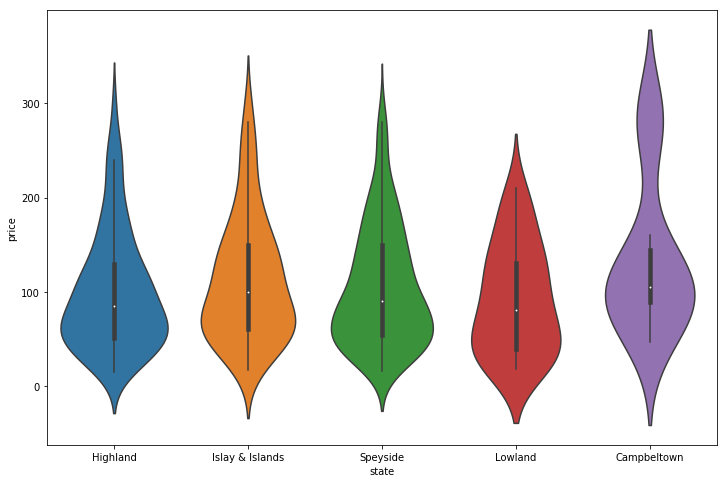

In [60]:
plt.figure(figsize = (12,8))
sns.violinplot(x = 'state', y = 'price', data = df[(df['country'] == 'Scotland') &( df['price'] < 300)]);

Campbletown has some interesting density in the $300 region, that could be just because it has less observations than other states.  Other than that, most regions have comparative densities and spreads.

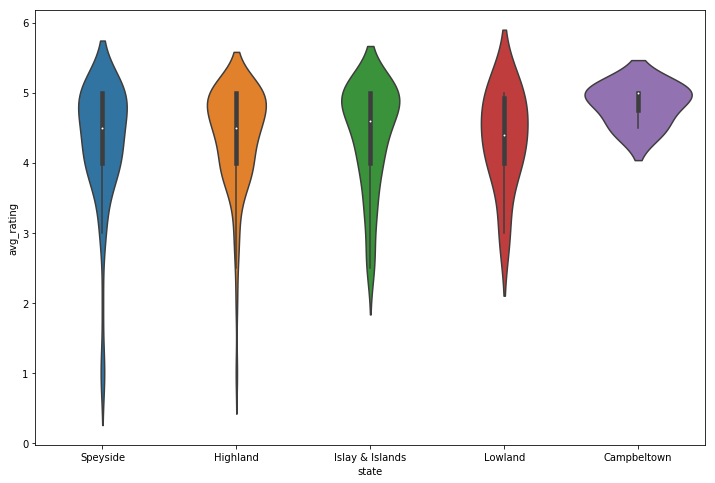

In [61]:
plt.figure(figsize = (12,8))
sns.violinplot(x = 'state', y = 'avg_rating', data = df[(df['country'] == 'Scotland') &( df['avg_rating'] > 0)]);

Nothing really interesting here either.  Seems like their ratings are similarly distributed as well.  
Speyside and Highland have a couple bad reviews but thats probably because they have so many.  Same thought goes for the lack of the tail for Campbeltown (Not enough samples to get a bad review outlier).  

----

## Single Malt vs. Blended

I haven't really had much in the way of blended whiskey.  I typically gravitate towards single malts, but I wanted to see if there was any difference as far as reviews.

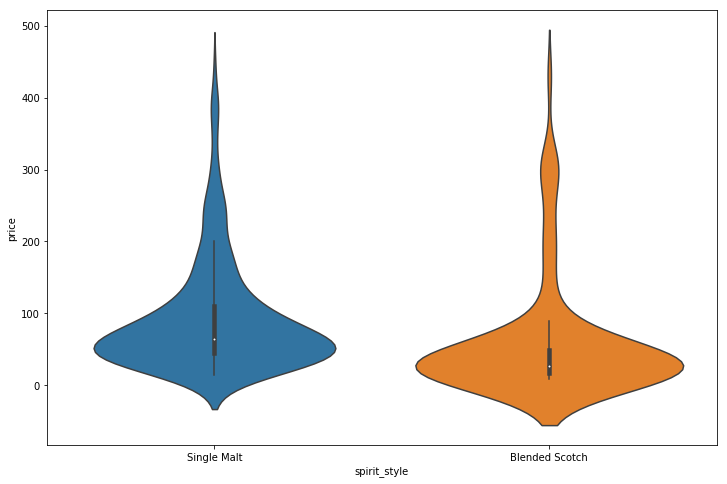

In [62]:
plt.figure(figsize = (12,8))
sns.violinplot(x = 'spirit_style', y = 'price', data = df[(df['price'] < 450) &( df['avg_rating'] > 0)]);

Single Malts tend to be the ones that are extremely expensive and really drag the viz out.

One thing of note is that the Blended whiskey tends to be on average a bit cheaper than the single malts.
  - _This makes sense as a single malt gets all its flavor from a single process and a blended gets it from blending multiple whiskies together._  

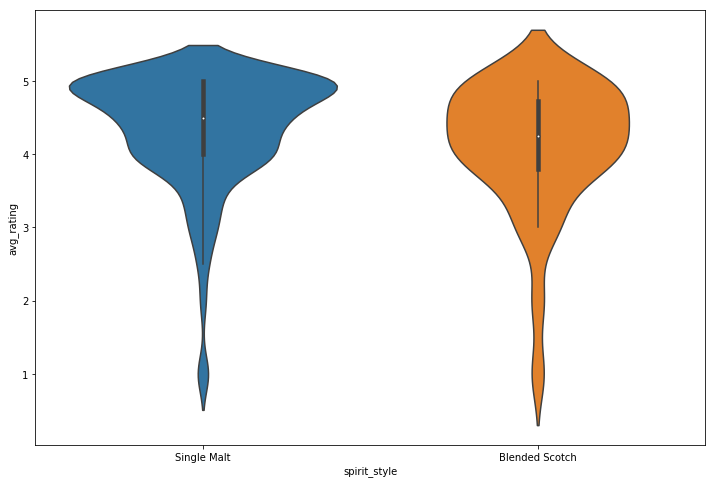

In [202]:
plt.figure(figsize = (12,8))
sns.violinplot(x = 'spirit_style', y = 'avg_rating', data = df[(df['price'] < 450) &( df['avg_rating'] > 0)]);

Single malts appear to also receive a majority of the 5 star reviews and while blended scotches still get good reviews they're majority appears to fall in the 4.5 star region.

In [65]:
simple_rec_df = df[['title','price','avg_rating','taste','score',
                    'brand','description','spirit_style','state','taste_list']]

simple_rec_df.to_csv('./data/simple_rec_data.csv')

### Initial Recommender.  

Will be using cosign similarity with ..
- Taste feature after text vectorization
    - Also, will remove the word "seed" as a feature given that its associated with "mustard".
- A standardized version of the "price" feature will also be used (after removing stupid expensive observations).